In [80]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

tweets = pd.read_excel('tweets-stemmed.xlsx', usecols=['label','tweet_token_stemmed'])
tweets.columns = ['label','tweet']

tweets.head()

,label,tweet
0,0,"['awal', 'scene', 'bawang', 'nang', 'keinget',..."
1,1,"['gila', 'drama', 'cakep', 'cinematography', '..."
2,0,['jahat']
3,0,"['males', 'nonton', 'drakor', 'stalk', 'gtgt',..."
4,0,"['nam', 'do', 'san', 'emang', 'kasih', 'previe..."


In [81]:
#parse string to list
import ast

#join list
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
tweets["tweet_join"] = tweets["tweet"].apply(join_text_list)
tweets["tweet_join"].head()

0    awal scene bawang nang keinget karakter romant...
1    gila drama cakep cinematography kece cerita ba...
2                                                jahat
3                 males nonton drakor stalk gtgt wkwkw
4    nam do san emang kasih preview dikit opening d...
Name: tweet_join, dtype: object

In [82]:
#define predictor and target for classification

target = 'label'
predictor = ['tweet_join']
y = tweets[target]
X = tweets[predictor]

print(X.head())
print(y.head())

                                          tweet_join
0  awal scene bawang nang keinget karakter romant...
1  gila drama cakep cinematography kece cerita ba...
2                                              jahat
3               males nonton drakor stalk gtgt wkwkw
4  nam do san emang kasih preview dikit opening d...
0    0
1    1
2    0
3    0
4    0
Name: label, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1668, 1)
(1668,)
(417, 1)
(417,)


In [84]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print(type(y_train_categorical),y_train_categorical.shape)
print(type(y_test_categorical),y_test_categorical.shape)

<class 'numpy.ndarray'> (1668, 3)
<class 'numpy.ndarray'> (417, 3)


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 1500

tf_idf = TfidfVectorizer(max_features=max_features)
X_train_tfidf = tf_idf.fit_transform(X_train['tweet_join']).toarray()
X_test_tfidf = tf_idf.fit_transform(X_test['tweet_join']).toarray()

print(type(X_train_tfidf), X_train_tfidf.shape)
print(type(X_test_tfidf), X_test_tfidf.shape)

<class 'numpy.ndarray'> (1668, 1500)
<class 'numpy.ndarray'> (417, 1500)


In [86]:
#creating model sequential
model = Sequential()
model.add(Dense(64, input_dim=1500, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

#compile kelas model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train_tfidf, y_train_categorical, epochs=150)

Epoch 1/150
1668/1668 [==============================] - 0s 187us/step - loss: 1.0794 - accuracy: 0.4946
Epoch 2/150
1668/1668 [==============================] - 0s 74us/step - loss: 1.0037 - accuracy: 0.5234
Epoch 3/150
1668/1668 [==============================] - 0s 62us/step - loss: 0.8663 - accuracy: 0.6163
Epoch 4/150
1668/1668 [==============================] - 0s 66us/step - loss: 0.6790 - accuracy: 0.7428
Epoch 5/150
1668/1668 [==============================] - 0s 66us/step - loss: 0.5218 - accuracy: 0.7986
Epoch 6/150
1668/1668 [==============================] - 0s 63us/step - loss: 0.3773 - accuracy: 0.8717
Epoch 7/150
1668/1668 [==============================] - 0s 64us/step - loss: 0.2628 - accuracy: 0.9263
Epoch 8/150
1668/1668 [==============================] - 0s 63us/step - loss: 0.1903 - accuracy: 0.9532
Epoch 9/150
1668/1668 [==============================] - 0s 81us/step - loss: 0.1440 - accuracy: 0.9616
Epoch 10/150
1668/1668 [==============================] - 0s 91

In [89]:
#evaluate train data

scores = model.evaluate(X_train_tfidf, y_train_categorical)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

1668/1668 [==============================] - 0s 31us/step
Accuracy on training data: 0.9844124913215637% 
 Error on training data: 0.01558750867843628


In [92]:
dataTesting = X_test_tfidf
predictions = model.predict_classes(dataTesting)
predictions

array([0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2,

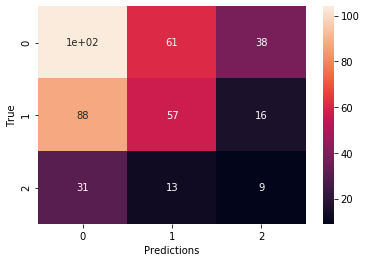

In [95]:
#evaluation confussion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True)
plt.xlabel("Predictions")
plt.ylabel("True") 
plt.show()

In [96]:
#check accuration score from confussion matrix using library

from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Error Rate: {:.2f}\n'.format(1 - accuracy_score(y_test, predictions)))

Accuracy: 0.41
Error Rate: 0.59

